In [14]:
TRAIN_PATH = ".//train"
TEST_PATH = ".//test"

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.models import Sequential

In [16]:
#Train from scratch #image pre prossessing
train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


#BatchNormalizatoin Train Data
train_generator= train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224), #Standard size, not too small, not too big 
    batch_size=4,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    subset="training",
    
)

#BatchNormalizatoin Validation Data
val_generator= train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224), 
    batch_size=4,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    subset="validation",
    
)

test_dataset= image.ImageDataGenerator(rescale=1./255)

test_generator= train_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224,224), 
    batch_size=4,
    class_mode='categorical',
    color_mode="rgb"
)

Found 13887 images belonging to 2 classes.
Found 3471 images belonging to 2 classes.
Found 4339 images belonging to 2 classes.


In [30]:
model = tf.keras.applications.Xception(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,3),
    pooling="avg",
    classes=2
    )

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [33]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

hist= model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=100,
    validation_data=val_generator,
    validation_steps=1,
    callbacks= [callback]
)

Epoch 1/100
5/5 [==============================] - 1s 80ms/step - loss: 0.6584 - accuracy: 0.8000 - val_loss: 0.5649 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 68ms/step - loss: 0.8562 - accuracy: 0.5000 - val_loss: 0.6410 - val_accuracy: 0.7500
Epoch 3/100
5/5 [==============================] - 0s 69ms/step - loss: 0.6281 - accuracy: 0.7000 - val_loss: 0.6253 - val_accuracy: 0.7500
Epoch 4/100
5/5 [==============================] - 0s 69ms/step - loss: 0.5600 - accuracy: 0.8500 - val_loss: 0.5381 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 67ms/step - loss: 0.6086 - accuracy: 0.8000 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 6/100
5/5 [==============================] - 0s 64ms/step - loss: 0.3183 - accuracy: 0.7500 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 7/100
5/5 [==============================] - 0s 68ms/step - loss: 0.2592 - accuracy: 0.9000 - val_loss: 0.6201 - val_accuracy: 0.7500
Epoch 8/100
5/5 [===

In [19]:
#model.save('my_model.h5')

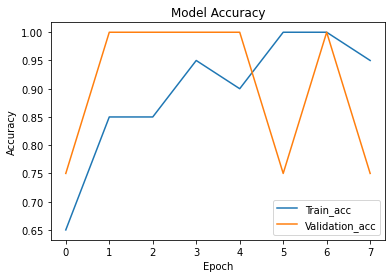

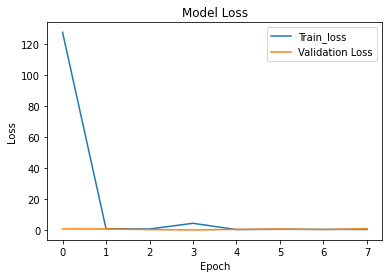

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

In [25]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

Evaluate on test data
1085/1085 [==============================] - 28s 25ms/step - loss: 0.6054 - accuracy: 0.8677
test loss, test acc: [0.6054075956344604, 0.8677114248275757]


In [22]:
# ANN: 86.77%
# CNN: 86.77%
# DenseNet121: 86.70%
# DenseNet169: 86.73%
# Xception: 86.77%
# ResNet152: 86.77%